In [1]:
from handout import create_augmented_dataset, train, evaluate, CIFAR10Classifier
from visualize import show_loss_curve, show_image_grid
from torch.utils.data import Subset, DataLoader
from torchvision import transforms
import torch

In [2]:
CLASSES = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

train_data = create_augmented_dataset(train=True)
# train_data_subset = Subset(train_data, torch.arange(10000))
train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)

test_data = create_augmented_dataset(train=False)
test_dataloader = DataLoader(test_data, batch_size=25, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


Beginning epoch 1 / 15
Beginning epoch 2 / 15
Beginning epoch 3 / 15
Beginning epoch 4 / 15
Beginning epoch 5 / 15
Beginning epoch 6 / 15
Beginning epoch 7 / 15
Beginning epoch 8 / 15
Beginning epoch 9 / 15
Beginning epoch 10 / 15
Beginning epoch 11 / 15
Beginning epoch 12 / 15
Beginning epoch 13 / 15
Beginning epoch 14 / 15
Beginning epoch 15 / 15


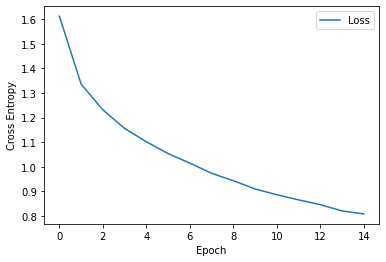

In [3]:
model = CIFAR10Classifier()

history = train(model=model, dataloader=train_dataloader, epochs=15, save=True)
show_loss_curve(history)

# model = torch.load("model.pt")

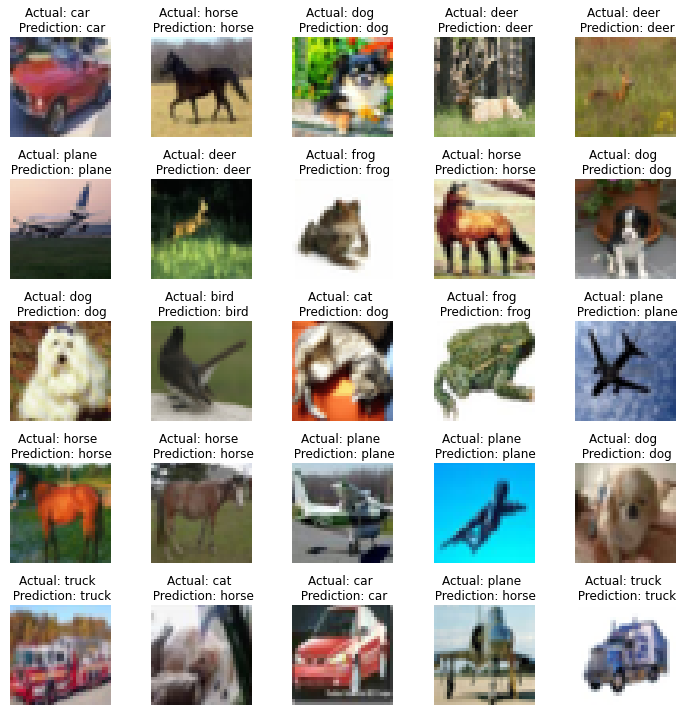

In [4]:
test_iterator = iter(test_dataloader)
images, labels = next(test_iterator)

with torch.no_grad():
    predictions = model(images)
    predictions_as_labels = torch.argmax(predictions, 1)

    show_image_grid(images, labels, predictions_as_labels)

In [5]:
acc = evaluate(model, test_dataloader)
print(f"Accuracy for test data: {acc}%")

Accuracy for test data: 77.97%


In [6]:
from PIL import Image
from pathlib import Path

class CustomTestDataset():
    def __init__(self):
        custom_data_path = Path("./custom_data")
        
        self.images = torch.empty(0, 3, 32, 32)
        self.labels = torch.empty(0, dtype=torch.int32)

        for file in custom_data_path.iterdir():
            label = CLASSES.index(file.stem.split("_")[-1])
            transform = transforms.Compose([
                transforms.Resize(size=(32, 32)),
                transforms.ToTensor()
            ])
            image = transform(Image.open(file)).unsqueeze(0)

            self.images = torch.cat((self.images, image))
            self.labels = torch.cat((self.labels, torch.IntTensor([label])))

    def __getitem__(self, index):
        return self.images[index], self.labels[index]

    def __len__(self):
        return len(self.images)

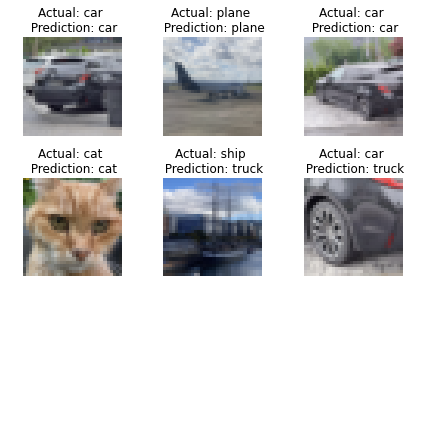

In [7]:
custom_data = CustomTestDataset()

with torch.no_grad():
    predictions = model(custom_data.images)
    predictions_as_labels = torch.argmax(predictions, 1)

    show_image_grid(custom_data.images, custom_data.labels, predictions_as_labels)
